Question 1

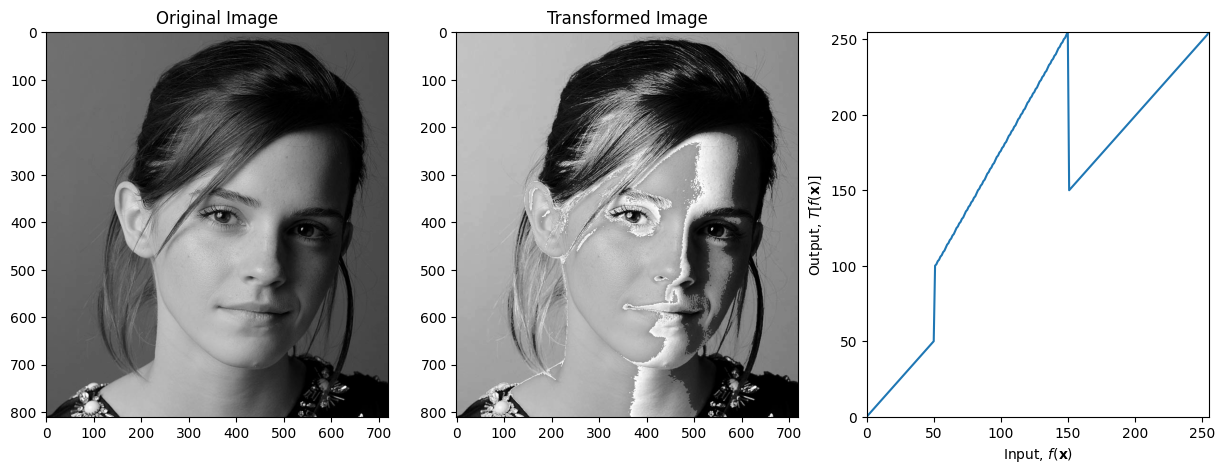

In [16]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Prepare Transform Function
t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace( 100, 255, 150 - 50).astype('uint8')
t3 = np.linspace(150,255 ,255-150).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
#open original image
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
#transform image
image_transformed = cv.LUT(img_orig, transform)

#plot results
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[2].plot(transform)
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
plt.show()

Question 2

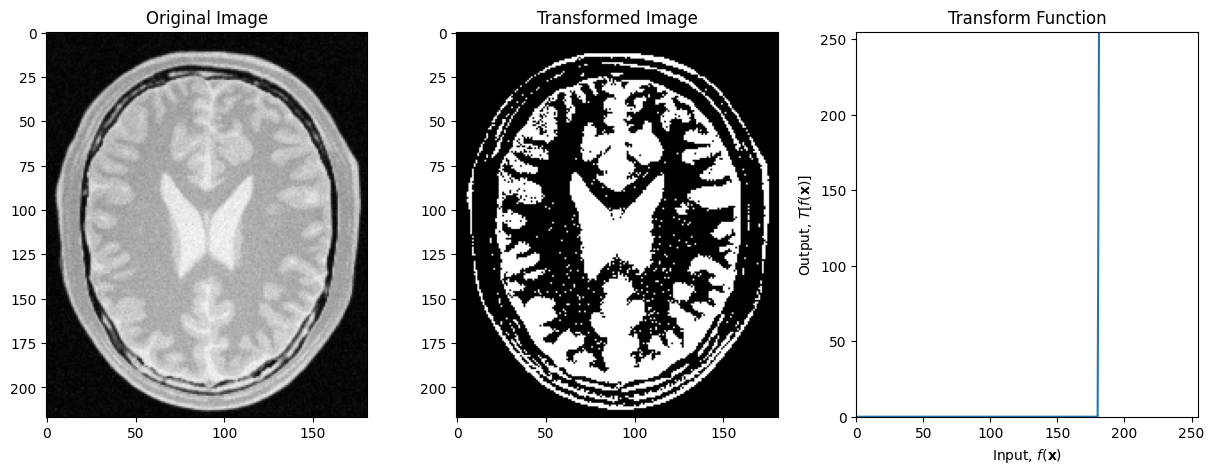

In [29]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0, 0, 181).astype('uint8')
t2 = np.linspace( 255, 255, 255 - 180).astype('uint8')
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
#open original image
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
#transform image
image_transformed = cv.LUT(img_orig, transform)

#plot results
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[2].plot(transform)
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_title('Transform Function')
plt.show()

Question 3

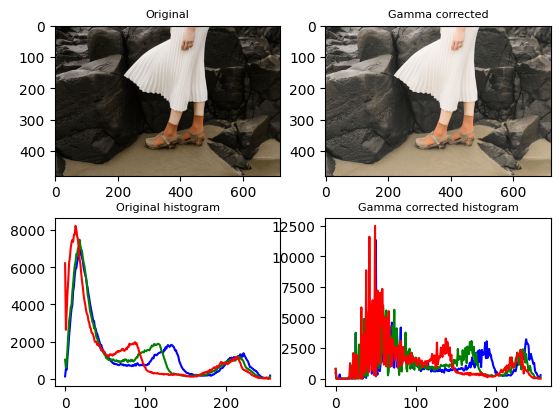

In [32]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# read the image
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
# convert to LAB color space
img_gamma = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
img_L = img_gamma[:,:,0]
# apply gamma correction to the L channel
gamma = 2
table = np.array([(i/255.0)**(1.0/gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_L_gamma = cv.LUT(img_L, table)
img_gamma[:,:,0] = img_L_gamma
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

# plot the images and their histograms
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img_orig)
axarr[0,0].set_title('Original', size=8)
axarr[0,1].imshow(img_gamma)
axarr[0,1].set_title('Gamma corrected', size=8)
axarr[1,0].set_title('Original histogram', size=8)
axarr[1,1].set_title('Gamma corrected histogram', size=8)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)    

Question 4

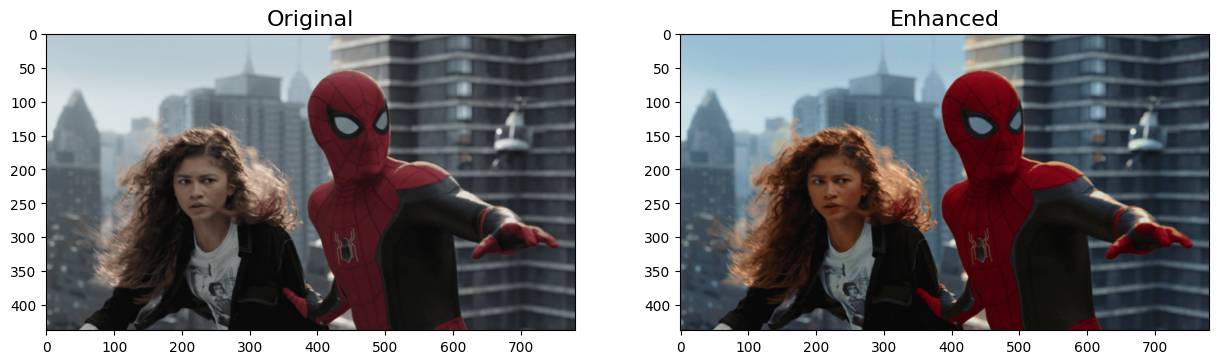

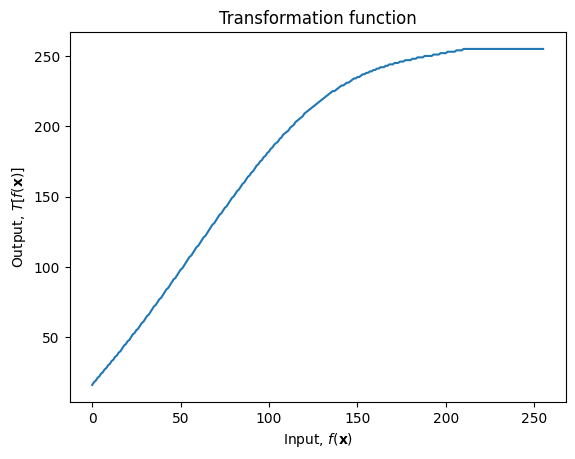

In [30]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


img_orig = cv.imread('spider.png', cv.IMREAD_COLOR)
# Convert img_orig to HSV
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
# Get the saturation channel
img_s = img_hsv[:,:,1]

# Define the transformation function
def transform(x, a, sigma):
    return min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

a = 0.7
sigma = 70
# Generate the LUT using the transformation function
table = np.array([transform(i, a, sigma) for i in np.arange(0, 256)]).astype('uint8')
# Apply the LUT to the saturation channel
img_s_transformed = cv.LUT(img_s, table)

#recombine image
img_hsv[:,:,1] = img_s_transformed
img_enhanced = cv.cvtColor(img_hsv, cv.COLOR_HSV2BGR)

# Plot original and transformed image
f, axarr = plt.subplots(1, 2, figsize=(15, 10))
axarr[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original', size=16)
axarr[1].imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
axarr[1].set_title('Enhanced', size=16)
plt.show()
fig, ax = plt.subplots()
ax.plot(table)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_title('Transformation function')
plt.show()

Question 5

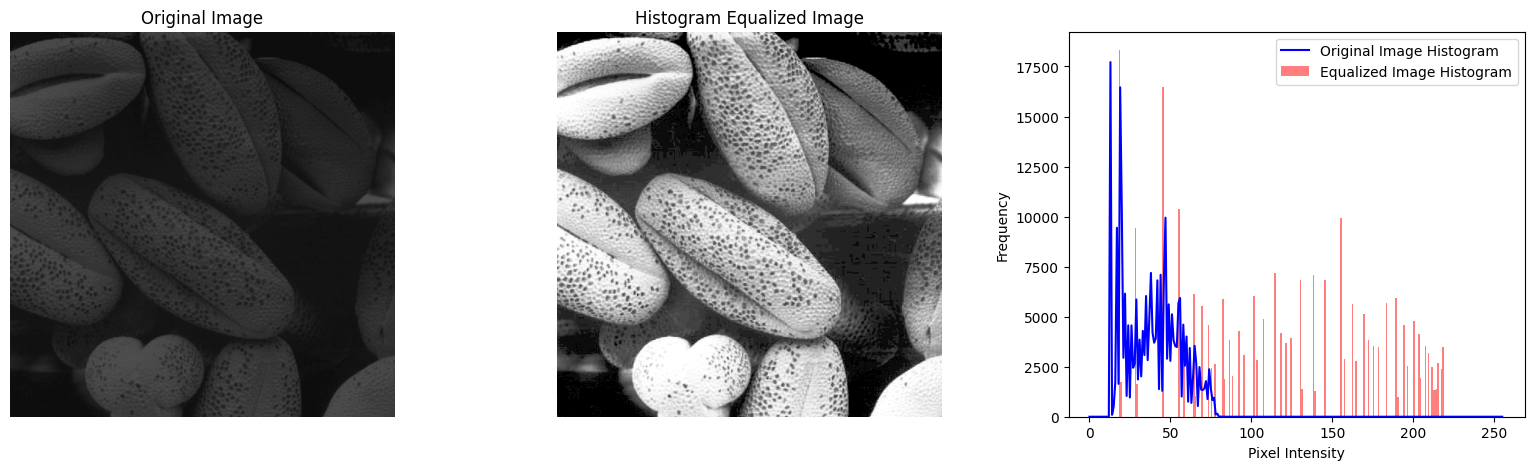

In [33]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

input_image = cv.imread("shells.tif", cv.IMREAD_GRAYSCALE)
# Calculate histogram
rows, cols = input_image.shape
histogram = np.zeros((256,), dtype=np.uint16)
for i in range(rows):
    for j in range(cols):
        intensity = input_image[i, j]
        histogram[intensity] += 1
# calculate cdf
cdf = np.zeros((256,), dtype=np.uint16)
for i in range(256):
    for j in range(i + 1):
        cdf[i] += histogram[j] * (255 / (rows * cols))
    cdf[i] = round(cdf[i], 0)
cdf = cdf.astype(np.uint16)

output_image = np.zeros_like(input_image)
for i in range(rows):
    for j in range(cols):
        intensity = input_image[i, j]
        output_image[i, j] = cdf[intensity]


# Create subplots for original and histogram equalized images
fig, axes = plt.subplots(1, 3, figsize=(20,5))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
# Display histogram equalized image
plt.subplot(1, 3, 2)
plt.imshow(output_image, cmap="gray")
plt.title("Histogram Equalized Image")
plt.axis("off")
# Plot histograms
plt.subplot(1, 3, 3)
plt.plot(histogram, color="blue")
plt.hist(output_image.flatten(), 256, [0, 256], color='r', alpha=0.5)
plt.legend(('Original Image Histogram', 'Equalized Image Histogram'))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show plots
plt.show()



Question 6

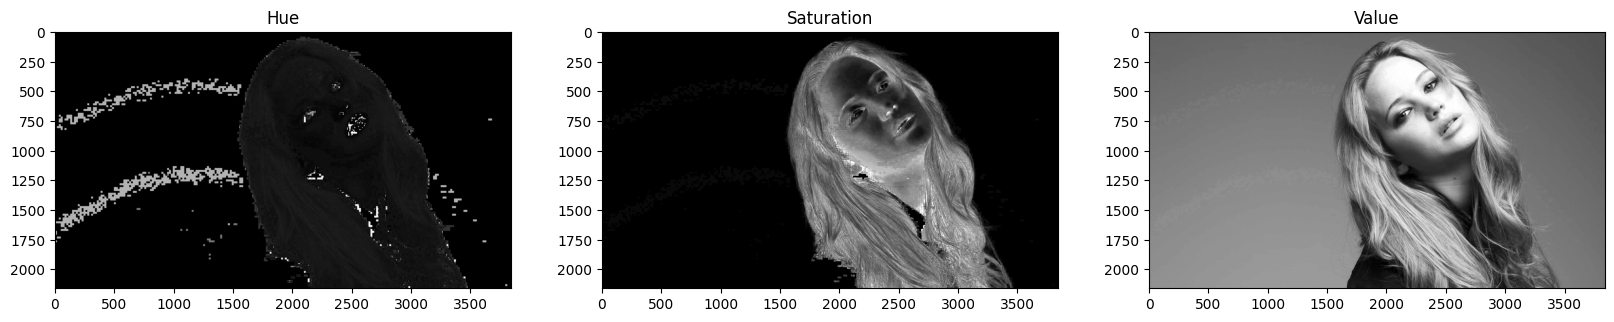

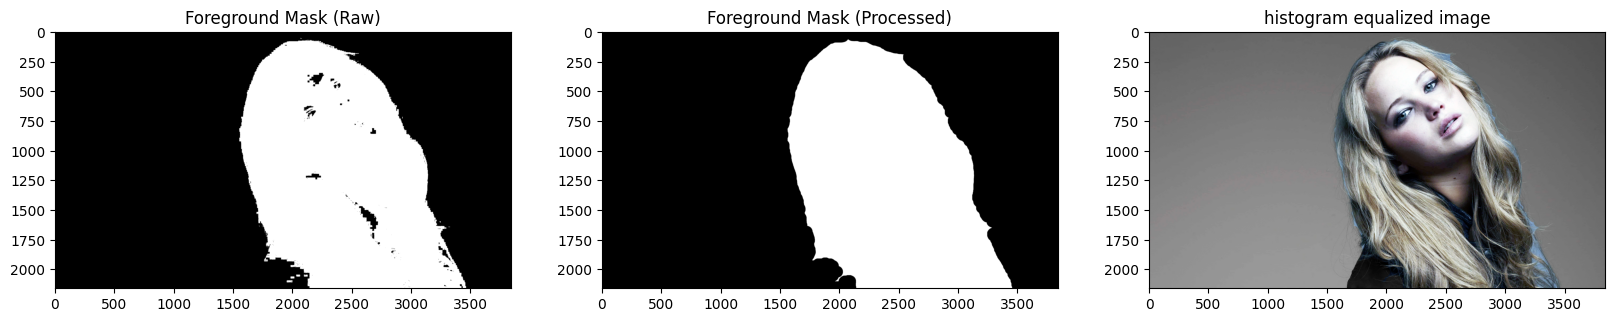

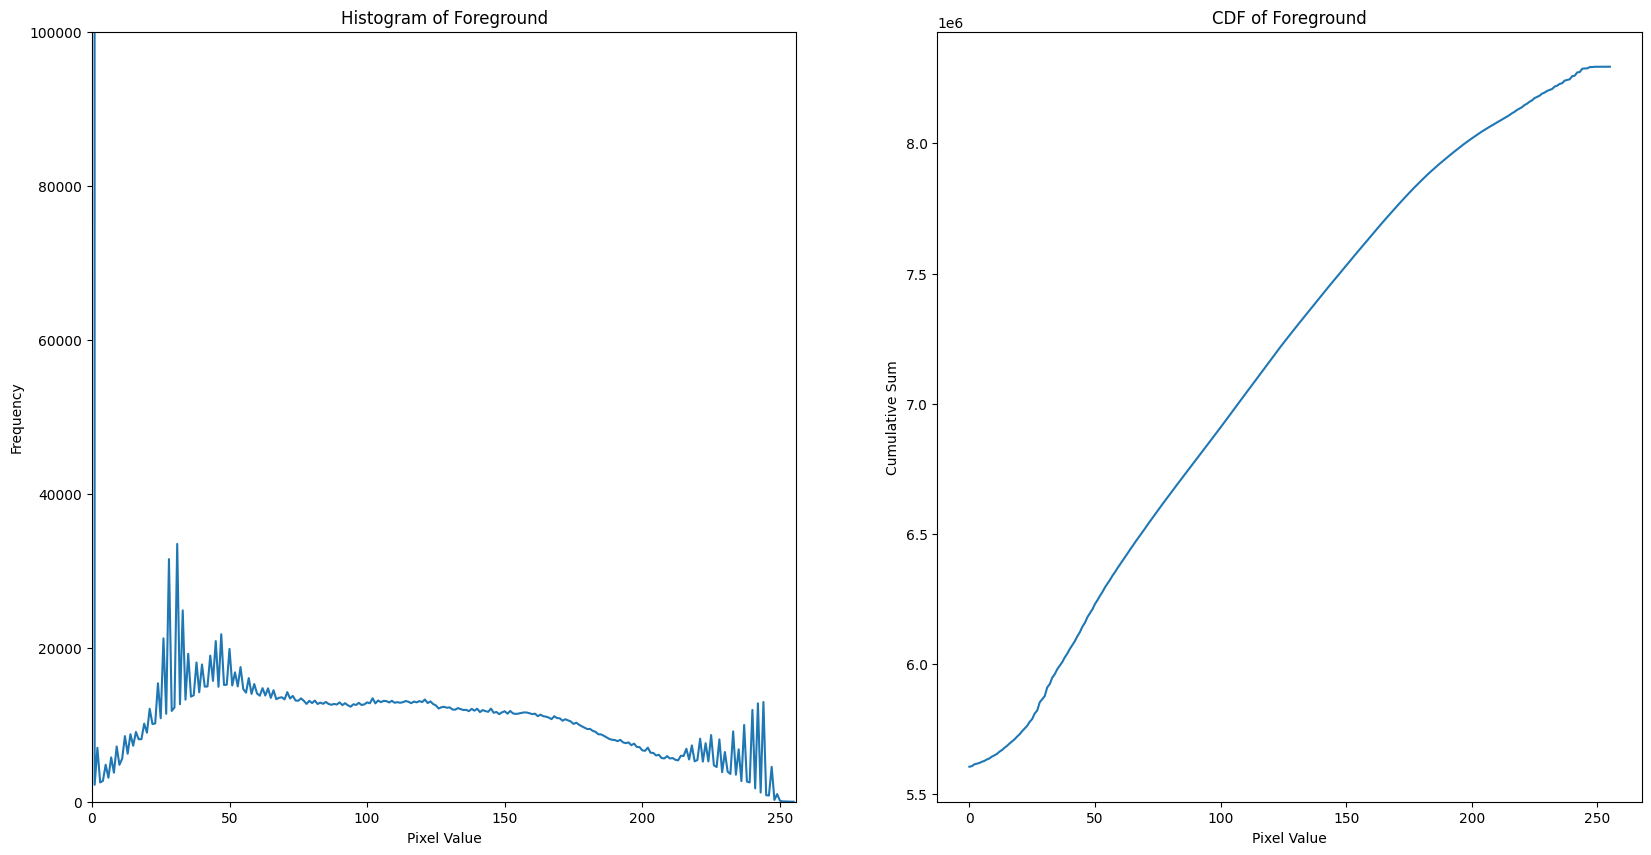

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('jeniffer.jpg', cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)
# Define a threshold value for saturation
threshold_value = 20
# Create a binary mask for the foreground based on the saturation channel
foreground_mask = np.zeros_like(s)
foreground_mask[s > threshold_value] = 255
foreground_raw = foreground_mask.copy()
foreground_mask = cv2.morphologyEx(foreground_mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (80, 80)))
foreground_mask = cv2.erode(foreground_mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20)), iterations=1)
background_mask = cv2.bitwise_not(foreground_mask)
# Apply the mask to image to extract foreground objects
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
foreground_r = cv2.bitwise_and(img[:,:,0], foreground_mask)
foreground_g = cv2.bitwise_and(img[:,:,1], foreground_mask)
foreground_b = cv2.bitwise_and(img[:,:,2], foreground_mask)
img_foreground = cv2.merge((foreground_b, foreground_g, foreground_r))
img_foreground = cv2.cvtColor(img_foreground, cv2.COLOR_BGR2GRAY)
#get the histogram of the foreground
hist_foreground = cv2.calcHist([img_foreground],[0],None,[256],[0,256])
#calculate the cumulative distribution function
cdf_foreground = hist_foreground.cumsum()
#histogram equalize the foreground
foreground_r = cv2.equalizeHist(foreground_r)
foreground_g = cv2.equalizeHist(foreground_g)
foreground_b = cv2.equalizeHist(foreground_b)
img_masked = cv2.merge((foreground_r, foreground_g, foreground_b))
background_mask = cv2.bitwise_not(foreground_mask)
#extract the background
background_r = cv2.bitwise_and(img[:,:,0],background_mask)
background_g = cv2.bitwise_and(img[:,:,1],background_mask)
background_b = cv2.bitwise_and(img[:,:,2],background_mask)
background = cv2.merge((background_b, background_g, background_r))
img_new = cv2.add(img_masked, background)

# img_masked = cv2.cvtColor(img_masked, cv2.COLOR_BGR2GRAY)

#plot the original image in HSV color space
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(foreground_raw, cmap='gray')
plt.title('Foreground Mask (Raw)')
plt.subplot(1, 3, 2)
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask (Processed)')
plt.subplot(1, 3, 3)
plt.imshow(img_new)
plt.title('histogram equalized image')
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(hist_foreground)
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.ylim([0, 100000])

plt.subplot(1, 2, 2)
plt.plot(cdf_foreground)
plt.title('CDF of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Sum')
plt.show()

Question 7

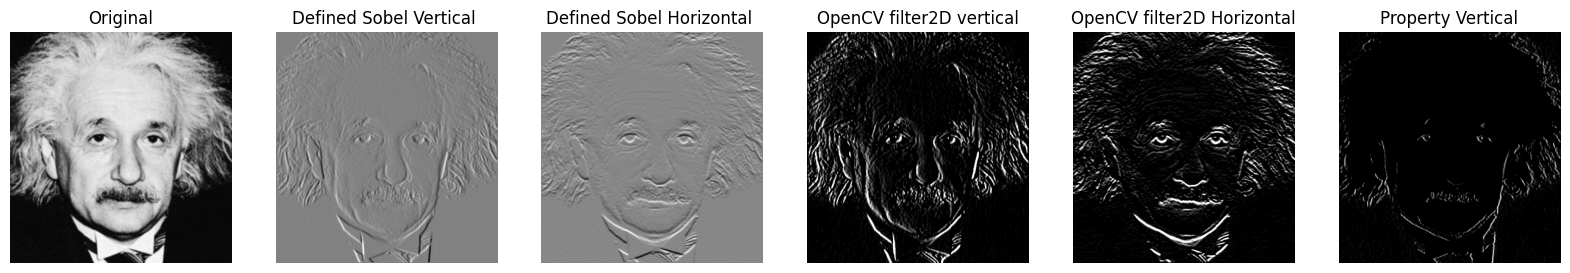

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# written function to filter image
def filterImg(image, kernel):
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    output = np.zeros(image.shape,'float')
    for y in range(pad_h,img_h-pad_h):
        for x in range(pad_w,img_w-pad_w):
            output[y, x] = np.dot(image_float[y - pad_h:y + pad_h + 1, x - pad_w:x + pad_w + 1].flatten(), kernel.flatten())
    return output

# Read image
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
# Sobel horizontal
kernel_h = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
# Sobel vertical
kernel_v = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
# Using Propertry of Convolution
kernel_1 = np.array([(1), (2), (1)], dtype='float')
kernel_2 = np.array([(1, 0, -1)], dtype='float')
#Part A
#  Using OpenCV
imgcv = cv.filter2D(img,-1,kernel_v)
imgch = cv.filter2D(img,-1,kernel_h)
#Part B
#  Using Defined Function
imgv = filterImg(img, kernel_v)
imgh = filterImg(img, kernel_h)
#Part C
#  Using Property of Convolution
imgpv = cv.filter2D(img, -1, kernel_1)
imgpv = cv.filter2D(imgpv, -1, kernel_2)

images=[img,imgv,imgh,imgcv,imgch,imgpv]
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(['Original','Defined Sobel Vertical ','Defined Sobel Horizontal ','OpenCV filter2D vertical','OpenCV filter2D Horizontal','Property Vertical'][i])
    plt.axis('off')
plt.show()

Question 8

In [40]:
import cv2
import numpy as np

def zoom_nearest_neighbor(image, zoom_factor):
    height, width, _ = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            src_x = int(x / zoom_factor)
            src_y = int(y / zoom_factor)
            new_image[y, x] = image[src_y, src_x]
    
    return new_image

def zoom_bilinear(image, zoom_factor):
    height, width, _ = image.shape
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    
    for y in range(new_height):
        for x in range(new_width):
            src_x = x / zoom_factor
            src_y = y / zoom_factor
            
            x1, y1 = int(src_x), int(src_y)
            x2, y2 = x1 + 1, y1 + 1
            
            if x2 >= width:
                x2 = width - 1
            if y2 >= height:
                y2 = height - 1
            
            dx = src_x - x1
            dy = src_y - y1
            
            new_image[y, x] = (
                (1 - dx) * (1 - dy) * image[y1, x1] +
                dx * (1 - dy) * image[y1, x2] +
                (1 - dx) * dy * image[y2, x1] +
                dx * dy * image[y2, x2]
            ).astype(np.uint8)

    return new_image

def normalized_ssd(image, zoomed_image):
    image_width, image_height, _ = image.shape
    zoomed_width, zoomed_height, _ = zoomed_image.shape
    if image_width < zoomed_width :
        zoomed_image = zoomed_image[:image_width,:,:]
    elif image_width > zoomed_width :
        image = image[:zoomed_width,:,:]
    
    if image_height < zoomed_height :
        zoomed_image = zoomed_image[:,:image_height,:]
    elif image_height > zoomed_height :
        image = image[:,:zoomed_height,:]

    return np.sum((image - zoomed_image) ** 2) / (image.shape[0] * image.shape[1]*3)

# Load an image
image = cv2.imread('zooming/im01small.png')
image_large = cv2.imread('zooming/im01.png')
# Specify zoom factor (between 0 and 10)
zoom_factor = 4.0
# Zoom using nearest-neighbor interpolation
zoomed_nearest = zoom_nearest_neighbor(image, zoom_factor)
# Zoom using bilinear interpolation
zoomed_bilinear = zoom_bilinear(image, zoom_factor)
# ssd_n = normalized_ssd(image_large, zoomed_nearest)
# ssd_b = normalized_ssd(image_large, zoomed_bilinear)
# print(ssd_n,ssd_b)
# Display the original and zoomed images
cv2.imshow('Original Image', image_large)
cv2.imshow('Zoomed Nearest Neighbor', zoomed_nearest)
cv2.imshow('Zoomed Bilinear', zoomed_bilinear)
cv2.waitKey(0)
cv2.destroyAllWindows()
small_images=["zooming/im01small.png","zooming/im02small.png","zooming/im03small.png","zooming/im04small.png","zooming/im05small.png","zooming/im06small.png","zooming/im07small.png","zooming/im08small.png","zooming/im09small.png","zooming/im10small.png","zooming/im11small.png","zooming/im12small.png","zooming/im13small.png","zooming/im14small.png","zooming/im15small.png","zooming/im16small.png","zooming/im17small.png","zooming/im18small.png","zooming/im19small.png","zooming/im20small.png"]
original_images=["zooming/im01.png","zooming/im02.png","zooming/im03.png","zooming/im04.png","zooming/im05.png","zooming/im06.png","zooming/im07.png","zooming/im08.png","zooming/im09.png","zooming/im10.png","zooming/im11.png","zooming/im12.png"]
# zoom_factor = 4.0
# normalized_ssds = []
# for i in range(11):
#     small_image = cv2.imread(small_images[i])
#     original_image = cv2.imread(original_images[i])
#     # if small_image.shape[0] > original_image.shape[0]:
#     zoomed_nearest = zoom_nearest_neighbor(small_image, zoom_factor)
#     zoomed_bilinear = zoom_bilinear(small_image, zoom_factor)  
#     # get normalized ssd of original and zoomed nearest
#     ssd_nearest = normalized_ssd(original_image, zoomed_nearest)
#     # get dsd of original and zoomed bilinear
#     ssd_bilinear = normalized_ssd(original_image, zoomed_bilinear)
#     print( "Image[", i+1 , "] ssd_nearest : ",ssd_nearest," ssd_bilinear : ",ssd_bilinear)

Question 9

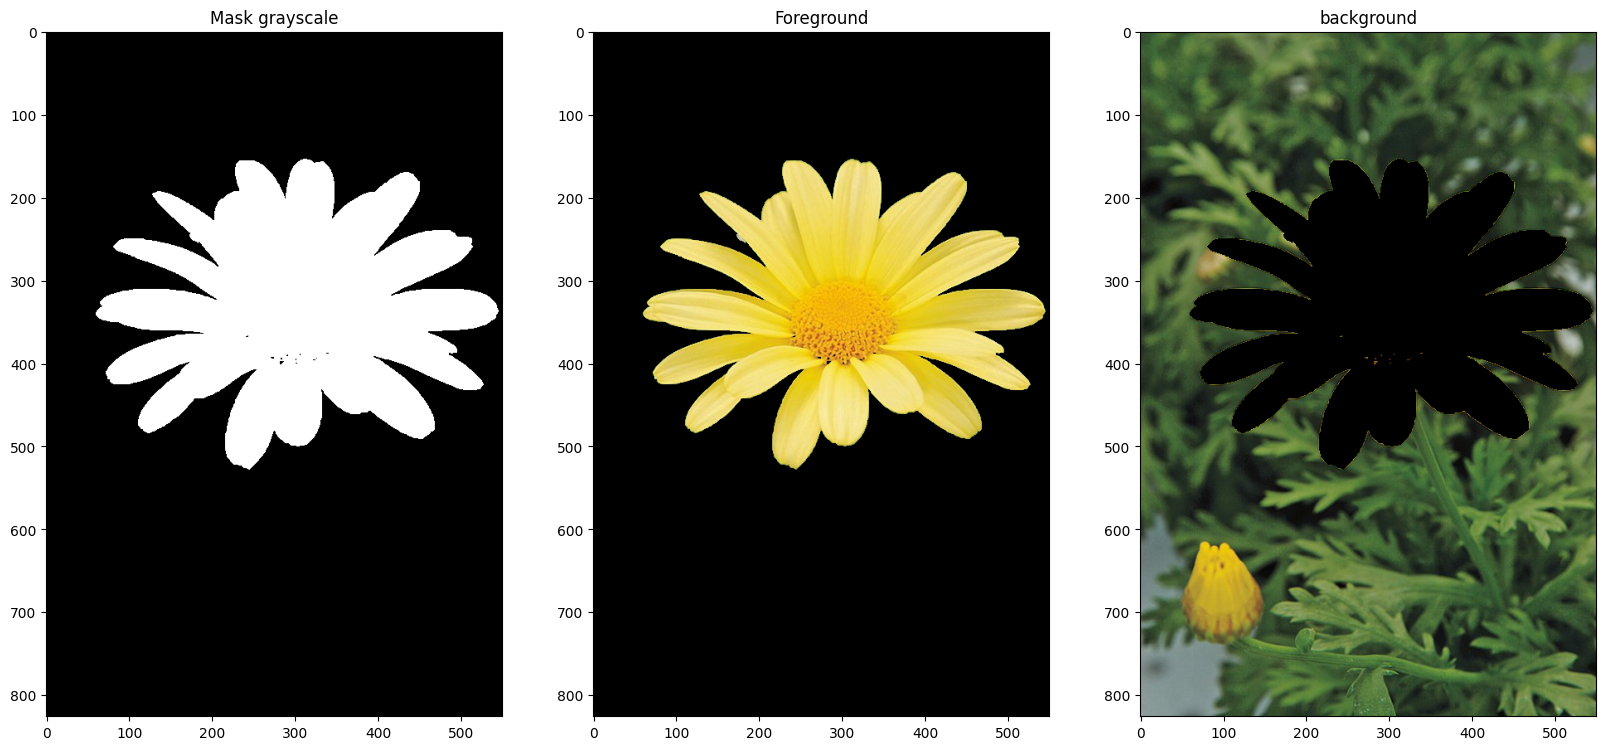

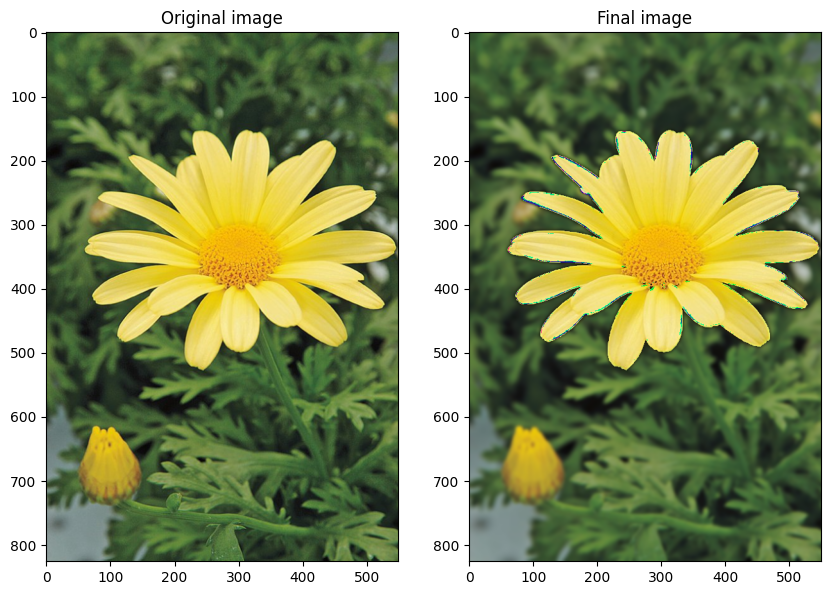

In [42]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt
img = cv.imread('flower.png',cv.IMREAD_COLOR)


rect = (50,150,500,380)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
mask = np.zeros(img.shape[:2],np.uint8)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
foreground = img * mask2[:, :, np.newaxis]
background = img - foreground
blurred_background = cv.GaussianBlur(background, (13, 13), 0)
final_image = blurred_background + foreground
final_image = cv.cvtColor(final_image, cv.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
img  = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(mask2, cmap='gray')
plt.title('Mask grayscale')
plt.subplot(1, 3, 2)
foreground = cv.cvtColor(foreground, cv.COLOR_BGR2RGB)
plt.imshow(foreground)
plt.title('Foreground')
plt.subplot(1, 3, 3)
background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
plt.imshow(background)
plt.title('background')
plt.show()

plt.figure(figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title('Final image')
plt.show()